<a href="https://colab.research.google.com/github/MudassirABBASSi/Computer-Vision/blob/main/Yolo_(object_detection_library).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configure API keys
To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

Go to your Roboflow Settings page. Click Copy. This will place your private key in the clipboard.
In Colab, go to the left pane and click on Secrets (🔑). Store Roboflow API Key under the name ROBOFLOW_API_KEY.

In [1]:
!nvidia-smi

Wed Mar  5 15:26:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# yolo installition

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.7/112.6 GB disk)


#CLI

In [4]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 5.35M/5.35M [00:00<00:00, 77.7MB/s]
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 104k/104k [00:00<00:00, 74.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 43.1ms
Speed: 15.1ms preprocess, 43.1ms inference, 368.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


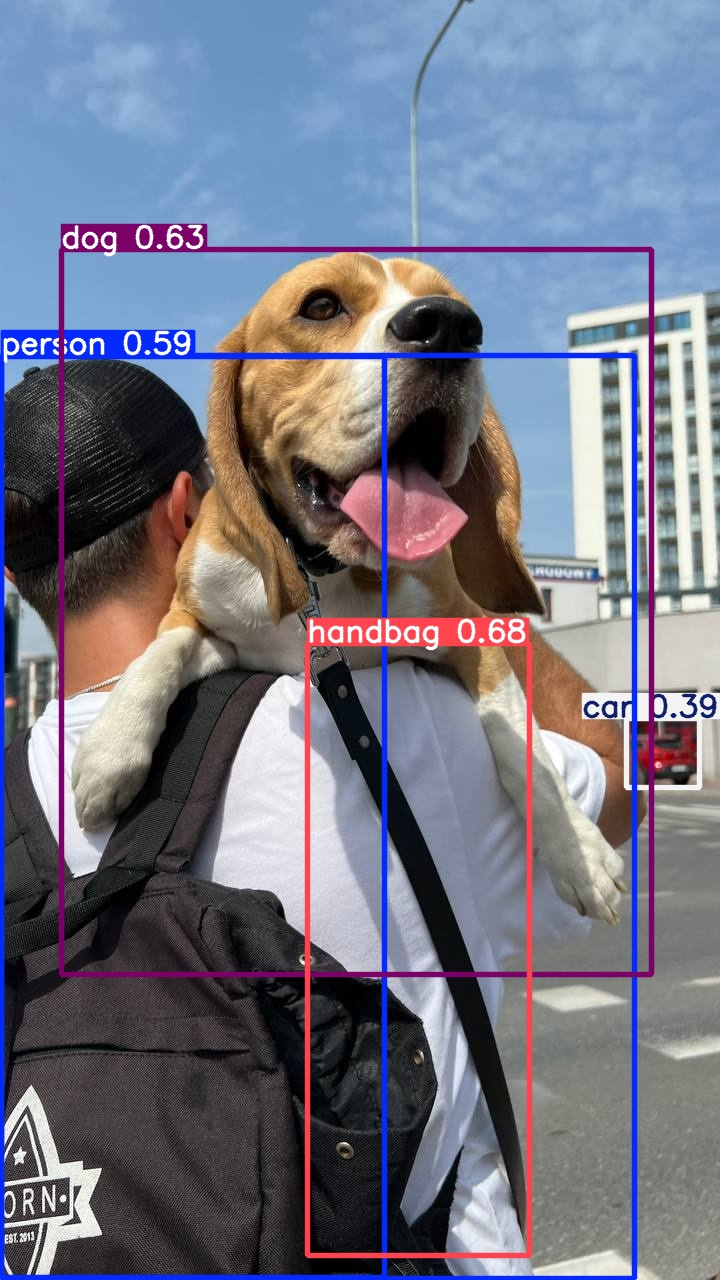

In [5]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'{HOME}/runs/detect/predict/dog.jpg', width=600)

In [6]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/ws.jpg' save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/ws.jpg: 640x640 1 person, 20.0ms
Speed: 6.4ms preprocess, 20.0ms inference, 230.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


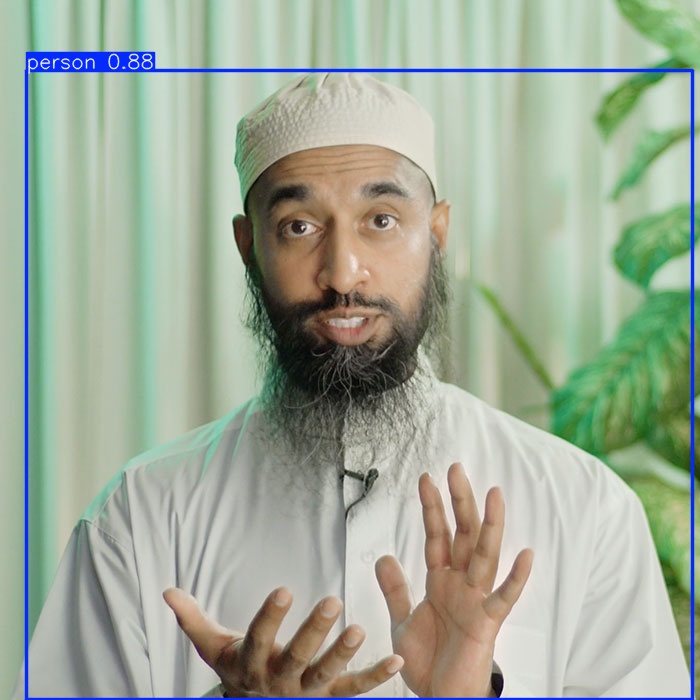

In [7]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'{HOME}/runs/detect/predict2/ws.jpg', width=600)

In [8]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/images.jpeg' save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/images.jpeg: 640x640 1 person, 3 cars, 12.7ms
Speed: 5.3ms preprocess, 12.7ms inference, 132.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


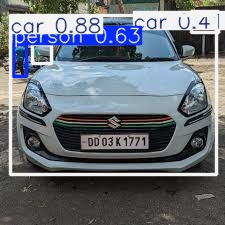

In [21]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'{HOME}/runs/detect/predict3/images.jpg', width=600)